# <center> Demand Forecasting</center>
________

<center><img src='https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/cover_1_3vEBqwk-thumbnail-1200x1200.png'/></center>

## About

Demand Forecasting is the pivotal business process around which strategic and operational plans of a company are devised. Based on the Demand Forecast, strategic and long-range plans of a business like budgeting, financial planning, sales and marketing plans, capacity planning, risk assessment and mitigation plans are formulated.

## Problem Statement

One of the largest retail chains in the world wants to use their vast data source to __build an efficient forecasting model__ to predict the sales for each SKU in its portfolio at its __76 different stores__ using historical sales data for the __past 3 years__ on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. Can you still forecast accurately the sales values for every such product/SKU-store combination for the __next 12 weeks accurately__? 

- If yes, then dive right in! Let's Play

## Data Description

<center><img src='https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1279142%2F4f09fa27a17b01fa40700e7b80d87add%2Fdataset_description.jpg?generation=1594430740572308&alt=media'/></center>

## Evaluation Metric
- The evaluation metric for this competition is 100*RMSLE (Root Mean Squared Log Error).

# Let's Begin

In [ ]:
! pip install catboost

     |████████████████████████████████| 64.8MB 52kB/s 


In [ ]:
# To print multiple output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
## Import all the required libraries

import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
train=pd.read_csv('/content/drive/My Drive/AVCompetition /JanataHack : Demand Forecasting/train.csv',parse_dates=['week'])

test=pd.read_csv('/content/drive/My Drive/AVCompetition /JanataHack : Demand Forecasting/test.csv',parse_dates=['week'])

sample=pd.read_csv('/content/drive/My Drive/AVCompetition /JanataHack : Demand Forecasting/sample_submission.csv')

In [ ]:
train.head(10)
print('Shape of training data is {}'.format(train.shape))

print('-------------'*10)

test.head()
print('Shape of test data is {}'.format(test.shape))

print('--------------'*10)

sample.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52
5,9,2011-01-17,8091,219009,227.2875,227.2875,0,0,18
6,10,2011-01-17,8091,219029,327.0375,327.0375,0,0,47
7,13,2011-01-17,8091,223245,210.9000,210.9000,0,0,50
8,14,2011-01-17,8091,223153,190.2375,234.4125,1,1,82
9,17,2011-01-17,8095,216418,99.0375,99.0375,0,0,99


Shape of training data is (150150, 9)
----------------------------------------------------------------------------------------------------------------------------------


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,2013-07-16,8091,216418,108.3000,108.3000,0,0
1,212646,2013-07-16,8091,216419,109.0125,109.0125,0,0
2,212647,2013-07-16,8091,216425,133.9500,133.9500,0,0
3,212648,2013-07-16,8091,216233,133.9500,133.9500,0,0
4,212649,2013-07-16,8091,217390,176.7000,176.7000,0,0


Shape of test data is (13860, 8)
--------------------------------------------------------------------------------------------------------------------------------------------


,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0


In [ ]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [ ]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [ ]:
train['is_display_sku'].unique()

array([0, 1])

## Data Visualization

In [ ]:
train['week'].unique()

array(['2011-01-17T00:00:00.000000000', '2011-01-24T00:00:00.000000000',
       '2011-01-31T00:00:00.000000000', '2011-07-02T00:00:00.000000000',
       '2011-02-14T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-07-03T00:00:00.000000000',
       '2011-03-14T00:00:00.000000000', '2011-03-21T00:00:00.000000000',
       '2011-03-28T00:00:00.000000000', '2011-04-04T00:00:00.000000000',
       '2011-11-04T00:00:00.000000000', '2011-04-18T00:00:00.000000000',
       '2011-04-25T00:00:00.000000000', '2011-02-05T00:00:00.000000000',
       '2011-09-05T00:00:00.000000000', '2011-05-16T00:00:00.000000000',
       '2011-05-23T00:00:00.000000000', '2011-05-30T00:00:00.000000000',
       '2011-06-06T00:00:00.000000000', '2011-06-13T00:00:00.000000000',
       '2011-06-20T00:00:00.000000000', '2011-06-27T00:00:00.000000000',
       '2011-04-07T00:00:00.000000000', '2011-11-07T00:00:00.000000000',
       '2011-07-18T00:00:00.000000000', '2011-07-25

Text(0.5, 0, 'Week')

Text(0, 0.5, 'units_sold')

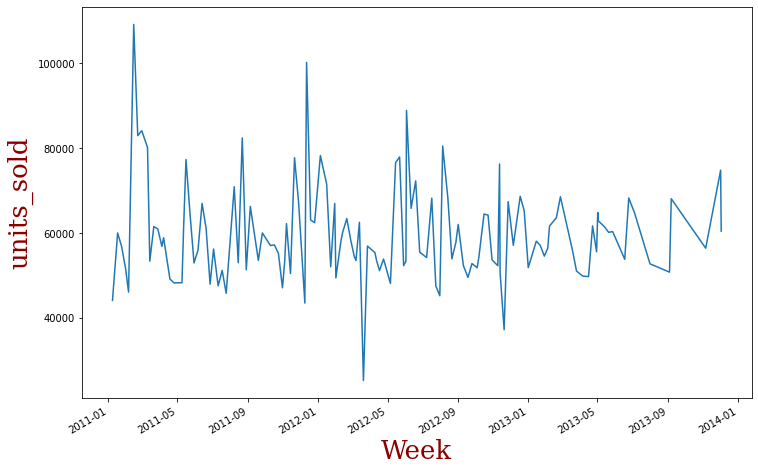

In [ ]:
# Number of units sold in accordance with the week

train.groupby('week').sum()['units_sold'].plot(figsize=(12,8))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('Week',fontdict=font)
plt.ylabel('units_sold',fontdict=font)


Text(0.5, 0, 'Week')

Text(0, 0.5, 'total_price')

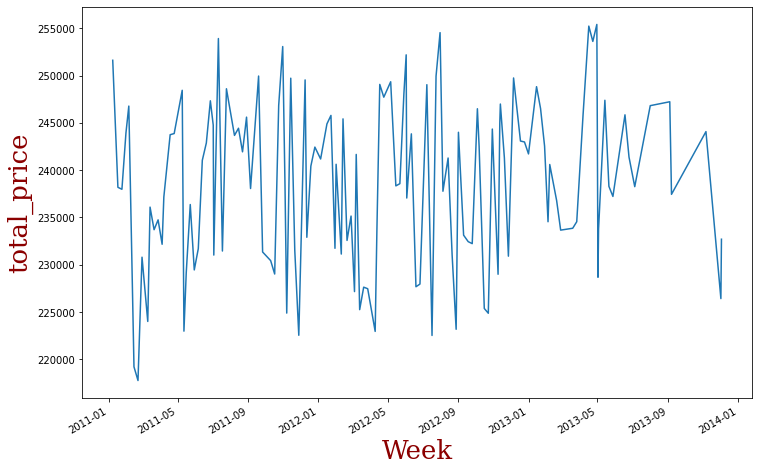

In [ ]:
# amount earned through sales in each week

train.groupby('week').sum()['total_price'].plot(figsize=(12,8))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('Week',fontdict=font)
plt.ylabel('total_price',fontdict=font)

In [ ]:
train['store_id'].unique()

array([8091, 8095, 8094, 8063, 8023, 8058, 8222, 8121, 8218, 8317, 8319,
       8392, 8398, 8400, 8422, 8438, 8555, 8562, 8869, 8991, 8911, 9001,
       9043, 9092, 9112, 9132, 9147, 9164, 9178, 9190, 9221, 9250, 9273,
       9279, 9281, 9328, 9371, 9442, 9430, 9439, 9425, 9432, 9436, 9456,
       9479, 9481, 9490, 9498, 9532, 9578, 9672, 9611, 9613, 9632, 9680,
       9700, 9713, 9731, 9745, 9770, 9789, 9813, 9823, 9837, 9809, 9845,
       9872, 9876, 9879, 9880, 9881, 9890, 9909, 9954, 9961, 9984])

Text(0.5, 0, 'store_id')

Text(0, 0.5, 'units_sold')

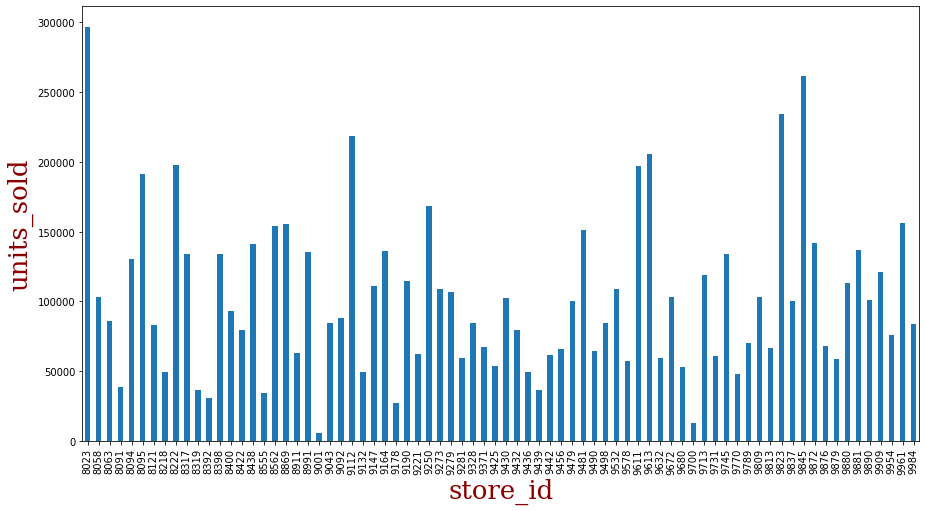

In [ ]:
## product sold by each of the store


train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('store_id',fontdict=font)
plt.ylabel('units_sold',fontdict=font)

- Max number of product are sold by ```8023``` store id.

In [ ]:
## Product was on display at a prominent place at the store

# Impact on sales on the basis of display
train.groupby(['is_display_sku','store_id']).sum()['units_sold']

is_display_sku  store_id
0               8023        209914
                8058         72347
                8063         68026
                8091         28831
                8094         98595
                             ...  
1               9890         30888
                9909         34003
                9954         14425
                9961         53139
                9984         18614
Name: units_sold, Length: 152, dtype: int64

In [ ]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52


In [ ]:
len(train['store_id'].unique())

76

In [ ]:
len(train['sku_id'].unique())

28

## Preprocessing the data

In [ ]:
# join test and train data
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [ ]:
df.head()
df.shape

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,train
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,train
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,train
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,train
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,train


(164010, 10)

### Creating Time Based Feature

In [ ]:
def create_week_date_featues(df):

    df['Year'] = pd.to_datetime(df['week']).dt.year

    df['Month'] = pd.to_datetime(df['week']).dt.month

    df['Day'] = pd.to_datetime(df['week']).dt.day

    df['Dayofweek'] = pd.to_datetime(df['week']).dt.dayofweek

    df['DayOfyear'] = pd.to_datetime(df['week']).dt.dayofyear

    df['Week'] = pd.to_datetime(df['week']).dt.week

    df['Quarter'] = pd.to_datetime(df['week']).dt.quarter 

    df['Is_month_start'] = pd.to_datetime(df['week']).dt.is_month_start

    df['Is_month_end'] = pd.to_datetime(df['week']).dt.is_month_end

    df['Is_quarter_start'] = pd.to_datetime(df['week']).dt.is_quarter_start

    df['Is_quarter_end'] = pd.to_datetime(df['week']).dt.is_quarter_end

    df['Is_year_start'] = pd.to_datetime(df['week']).dt.is_year_start

    df['Is_year_end'] = pd.to_datetime(df['week']).dt.is_year_end

    df['Semester'] = np.where(df['week'].isin([1,2]),1,2)

    df['Is_weekend'] = np.where(df['week'].isin([5,6]),1,0)

    df['Is_weekday'] = np.where(df['week'].isin([0,1,2,3,4]),1,0)

    df['Days_in_month'] = pd.to_datetime(df['week']).dt.days_in_month
    
    # df['Hour'] = pd.to_datetime(df['DateTime']).dt.hour
    
    #df['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df.DateTime]

    return df

In [ ]:
df=create_week_date_featues(df)

In [ ]:
df.head(5)
df.shape

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,Year
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011


(164010, 27)

In [ ]:
# df['profit_loss_incurred']=df['total_price']-df['base_price']

# df['profit_loss_incurred'].unique()

# here we can see profit and loss in sales compare to the product base price

In [ ]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,Year
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,2011


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# train['total_price'].plot(kind='hist')

# train['base_price'].plot(kind='hist')

In [ ]:
col=['store_id','sku_id','Year']

In [ ]:
for i in col:
    df = pd.get_dummies(df, columns=[i])

In [ ]:
# col2=['Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']

# for i in col2:
#     df = pd.get_dummies(df, columns=[i])

In [ ]:
df.head()

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,...,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Year_2011,Year_2012,Year_2013
0,1,2011-01-17,99.0375,111.8625,0,0,20.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,2011-01-17,99.0375,99.0375,0,0,28.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,2011-01-17,133.9500,133.9500,0,0,19.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,2011-01-17,133.9500,133.9500,0,0,44.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2011-01-17,141.0750,141.0750,0,0,52.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.drop(['record_ID','week'],inplace=True,axis=1)

# df.drop(['record_ID','week','store_id','sku_id'],inplace=True,axis=1)

In [ ]:
# df.drop(['store_id','sku_id'],axis=1,inplace=True)

In [ ]:
df.head()
df.shape

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,...,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Year_2011,Year_2012,Year_2013
0,99.0375,111.8625,0,0,20.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,99.0375,99.0375,0,0,28.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,133.9500,133.9500,0,0,19.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,133.9500,133.9500,0,0,44.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,141.0750,141.0750,0,0,52.0,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


(164010, 129)

### Treating skewed features

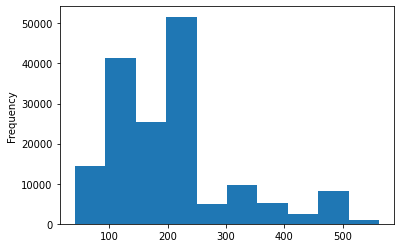

In [ ]:
df['total_price'].plot(kind='hist')

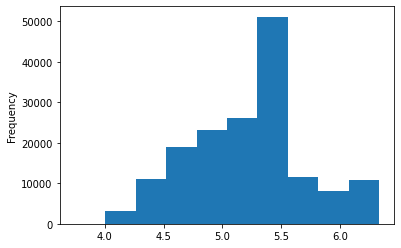

In [ ]:
df['total_price']=np.log1p(df['total_price'])
df['total_price'].plot(kind='hist')

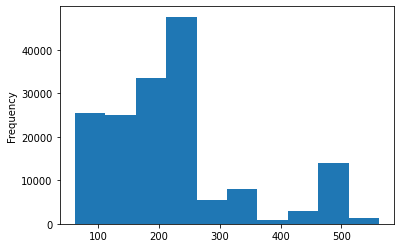

In [ ]:
df['base_price'].plot(kind='hist')

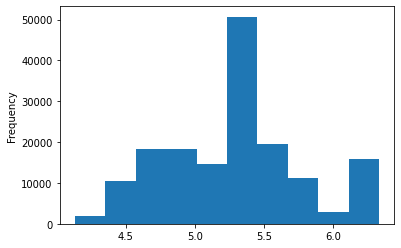

In [ ]:
df['base_price']=np.log1p(df['base_price'])
df['base_price'].plot(kind='hist')

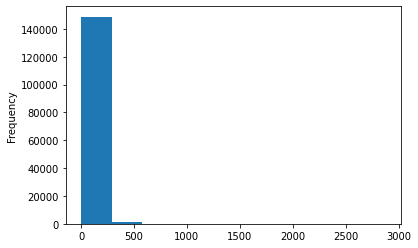

In [ ]:
df['units_sold'].plot(kind='hist')

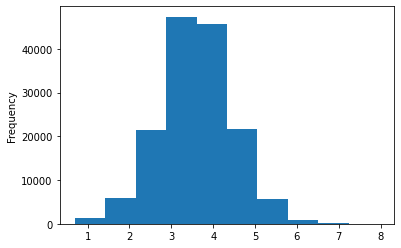

In [ ]:
df['units_sold']=np.log1p(df['units_sold'])
df['units_sold'].plot(kind='hist')

In [ ]:
# df['profit_loss_incurred'].plot(kind='hist')

In [ ]:
# df['profit_loss_incurred']=np.log1p(df['profit_loss_incurred'])
# df['profit_loss_incurred'].plot(kind='hist')

In [ ]:
df.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,...,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Year_2011,Year_2012,Year_2013
0,4.605545,4.726170,0,0,3.044522,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4.605545,4.605545,0,0,3.367296,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.904904,4.904904,0,0,2.995732,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4.904904,4.904904,0,0,3.806662,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4.956355,4.956355,0,0,3.970292,train,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# df.drop(['profit_loss_incurred'],axis=1,inplace=True)

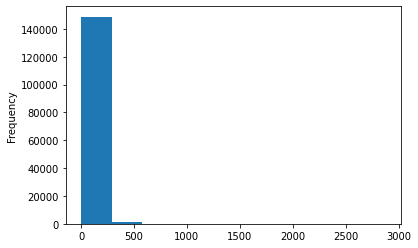

In [ ]:
# df['units_sold'].plot(kind='hist')

In [ ]:
train_1=df.loc[df.train_or_test.isin(['train'])]
test_1=df.loc[df.train_or_test.isin(['test'])]
train_1.drop(columns={'train_or_test'},axis=1,inplace=True)
test_1.drop(columns={'train_or_test'},axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_1.head()
train_1.shape
test_1.shape
test_1.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,...,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Year_2011,Year_2012,Year_2013
0,4.605545,4.726170,0,0,3.044522,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4.605545,4.605545,0,0,3.367296,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.904904,4.904904,0,0,2.995732,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4.904904,4.904904,0,0,3.806662,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4.956355,4.956355,0,0,3.970292,1,17,0,17,3,1,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


(150150, 128)

(13860, 128)

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,...,store_id_9876,store_id_9879,store_id_9880,store_id_9881,store_id_9890,store_id_9909,store_id_9954,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Year_2011,Year_2012,Year_2013
0,4.694096,4.694096,0,0,NaN,7,16,1,197,29,3,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.700594,4.700594,0,0,NaN,7,16,1,197,29,3,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.904904,4.904904,0,0,NaN,7,16,1,197,29,3,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.904904,4.904904,0,0,NaN,7,16,1,197,29,3,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5.180097,5.180097,0,0,NaN,7,16,1,197,29,3,False,False,False,False,False,False,2,0,0,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
x=train_1.drop(['units_sold'],axis=1)
test_1.drop(['units_sold'],axis=1,inplace=True)
y=train_1['units_sold']

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x.head()

In [ ]:
x=x.values
y=y.values
test_data=test_1.values

### Training the model with catboost

In [ ]:
def rmsle(y_true, y_pred):
  return np.sqrt(np.mean(np.power(np.log1p(y_true)-np.log1p(y_pred), 2)))*100

In [ ]:
print(rmsle(34.89,56))

46.259256267503446


In [ ]:
kfold, scores = KFold(n_splits=6, shuffle=True, random_state=0), list()
for train, test in kfold.split(x):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    
    model = CatBoostRegressor(random_state=27, max_depth=9, task_type="GPU", devices="0:1", n_estimators=10000, verbose=500,
                              eval_metric = 'RMSE')
    model.fit(x_train, y_train, cat_features=[12, 13, 14, 15,16,17],
              eval_set=(x_test, y_test))
    
    preds = model.predict(x_test)
    score = rmsle(y_test, preds)
    scores.append(score)
    print('Score for the following iteration is {}'.format(score))
    
    
print("Average: ", sum(scores)/len(scores))

Learning rate set to 0.046849
0:	learn: 0.8465208	test: 0.8409329	best: 0.8409329 (0)	total: 16.4ms	remaining: 2m 44s
500:	learn: 0.4220678	test: 0.4253796	best: 0.4253796 (500)	total: 5.59s	remaining: 1m 45s
1000:	learn: 0.3691478	test: 0.3788310	best: 0.3788310 (1000)	total: 11s	remaining: 1m 38s
1500:	learn: 0.3432775	test: 0.3593425	best: 0.3593425 (1500)	total: 16.4s	remaining: 1m 33s
2000:	learn: 0.3268773	test: 0.3492265	best: 0.3492265 (2000)	total: 21.8s	remaining: 1m 27s
2500:	learn: 0.3146576	test: 0.3428088	best: 0.3428088 (2500)	total: 27.2s	remaining: 1m 21s
3000:	learn: 0.3046917	test: 0.3383465	best: 0.3383465 (3000)	total: 32.7s	remaining: 1m 16s
3500:	learn: 0.2962657	test: 0.3353048	best: 0.3353048 (3500)	total: 38.4s	remaining: 1m 11s
4000:	learn: 0.2888789	test: 0.3331584	best: 0.3331568 (3999)	total: 44.1s	remaining: 1m 6s
4500:	learn: 0.2822430	test: 0.3314019	best: 0.3314019 (4500)	total: 49.6s	remaining: 1m
5000:	learn: 0.2763112	test: 0.3300289	best: 0.3300289

Score for the following iteration is 8.601754485661932
Learning rate set to 0.046849
0:	learn: 0.8454922	test: 0.8466983	best: 0.8466983 (0)	total: 17ms	remaining: 2m 49s
500:	learn: 0.4207378	test: 0.4262325	best: 0.4262325 (500)	total: 5.51s	remaining: 1m 44s
1000:	learn: 0.3683233	test: 0.3800665	best: 0.3800665 (1000)	total: 10.9s	remaining: 1m 38s
1500:	learn: 0.3426825	test: 0.3605550	best: 0.3605550 (1500)	total: 16.3s	remaining: 1m 32s
2000:	learn: 0.3262460	test: 0.3503796	best: 0.3503796 (2000)	total: 21.8s	remaining: 1m 27s
2500:	learn: 0.3138602	test: 0.3442397	best: 0.3442397 (2500)	total: 27.3s	remaining: 1m 21s
3000:	learn: 0.3040410	test: 0.3401453	best: 0.3401453 (3000)	total: 32.6s	remaining: 1m 16s
3500:	learn: 0.2957414	test: 0.3371393	best: 0.3371393 (3500)	total: 37.9s	remaining: 1m 10s
4000:	learn: 0.2883955	test: 0.3348646	best: 0.3348646 (4000)	total: 43.3s	remaining: 1m 4s
4500:	learn: 0.2818419	test: 0.3332123	best: 0.3332092 (4499)	total: 48.7s	remaining: 59

Score for the following iteration is 8.690532624754221
Learning rate set to 0.046849
0:	learn: 0.8460305	test: 0.8433192	best: 0.8433192 (0)	total: 16.5ms	remaining: 2m 45s
500:	learn: 0.4220802	test: 0.4267296	best: 0.4267296 (500)	total: 5.59s	remaining: 1m 46s
1000:	learn: 0.3691337	test: 0.3791645	best: 0.3791645 (1000)	total: 10.9s	remaining: 1m 38s
1500:	learn: 0.3435842	test: 0.3596620	best: 0.3596620 (1500)	total: 16.3s	remaining: 1m 32s
2000:	learn: 0.3270666	test: 0.3495758	best: 0.3495758 (2000)	total: 21.8s	remaining: 1m 27s
2500:	learn: 0.3148276	test: 0.3429713	best: 0.3429713 (2500)	total: 27.2s	remaining: 1m 21s
3000:	learn: 0.3048609	test: 0.3386834	best: 0.3386834 (3000)	total: 32.8s	remaining: 1m 16s
3500:	learn: 0.2963747	test: 0.3354095	best: 0.3354095 (3500)	total: 38.2s	remaining: 1m 10s
4000:	learn: 0.2889022	test: 0.3331147	best: 0.3331096 (3998)	total: 43.7s	remaining: 1m 5s
4500:	learn: 0.2823895	test: 0.3313058	best: 0.3313058 (4500)	total: 49.2s	remaining: 

Score for the following iteration is 8.646908024163455
Learning rate set to 0.046849
0:	learn: 0.8446843	test: 0.8503360	best: 0.8503360 (0)	total: 16.8ms	remaining: 2m 47s
500:	learn: 0.4209312	test: 0.4297958	best: 0.4297958 (500)	total: 5.73s	remaining: 1m 48s
1000:	learn: 0.3679284	test: 0.3828243	best: 0.3828243 (1000)	total: 11.4s	remaining: 1m 42s
1500:	learn: 0.3422776	test: 0.3635170	best: 0.3635170 (1500)	total: 17s	remaining: 1m 36s
2000:	learn: 0.3258226	test: 0.3529165	best: 0.3529165 (2000)	total: 22.4s	remaining: 1m 29s
2500:	learn: 0.3136116	test: 0.3465670	best: 0.3465670 (2500)	total: 27.9s	remaining: 1m 23s
3000:	learn: 0.3035387	test: 0.3423579	best: 0.3423579 (3000)	total: 33.5s	remaining: 1m 18s
3500:	learn: 0.2952551	test: 0.3394038	best: 0.3394038 (3500)	total: 39s	remaining: 1m 12s
4000:	learn: 0.2879673	test: 0.3372434	best: 0.3372425 (3999)	total: 44.5s	remaining: 1m 6s
4500:	learn: 0.2814343	test: 0.3354344	best: 0.3354344 (4500)	total: 50.1s	remaining: 1m 1

Score for the following iteration is 8.955010292128227
Learning rate set to 0.046849
0:	learn: 0.8449524	test: 0.8490628	best: 0.8490628 (0)	total: 16.7ms	remaining: 2m 47s
500:	learn: 0.4210768	test: 0.4276037	best: 0.4276037 (500)	total: 5.56s	remaining: 1m 45s
1000:	learn: 0.3685524	test: 0.3811656	best: 0.3811656 (1000)	total: 11s	remaining: 1m 39s
1500:	learn: 0.3430072	test: 0.3619444	best: 0.3619444 (1500)	total: 16.5s	remaining: 1m 33s
2000:	learn: 0.3264318	test: 0.3516211	best: 0.3516211 (2000)	total: 22.1s	remaining: 1m 28s
2500:	learn: 0.3142617	test: 0.3453170	best: 0.3453170 (2500)	total: 27.6s	remaining: 1m 22s
3000:	learn: 0.3044535	test: 0.3411134	best: 0.3411134 (3000)	total: 33.1s	remaining: 1m 17s
3500:	learn: 0.2959973	test: 0.3379033	best: 0.3379033 (3500)	total: 38.5s	remaining: 1m 11s
4000:	learn: 0.2887268	test: 0.3356734	best: 0.3356734 (4000)	total: 44s	remaining: 1m 5s
4500:	learn: 0.2822912	test: 0.3338026	best: 0.3338026 (4500)	total: 49.4s	remaining: 1m
5

Score for the following iteration is 8.742499573152031
Learning rate set to 0.046849
0:	learn: 0.8460153	test: 0.8434868	best: 0.8434868 (0)	total: 18.3ms	remaining: 3m 3s
500:	learn: 0.4227624	test: 0.4237614	best: 0.4237614 (500)	total: 5.59s	remaining: 1m 46s
1000:	learn: 0.3694707	test: 0.3764006	best: 0.3764006 (1000)	total: 11s	remaining: 1m 39s
2000:	learn: 0.3269103	test: 0.3465792	best: 0.3465792 (2000)	total: 21.9s	remaining: 1m 27s
2500:	learn: 0.3147181	test: 0.3402780	best: 0.3402780 (2500)	total: 27.3s	remaining: 1m 21s
3000:	learn: 0.3048245	test: 0.3359562	best: 0.3359562 (3000)	total: 32.7s	remaining: 1m 16s
3500:	learn: 0.2964372	test: 0.3327963	best: 0.3327963 (3500)	total: 38.2s	remaining: 1m 10s
4000:	learn: 0.2890594	test: 0.3305905	best: 0.3305905 (4000)	total: 43.6s	remaining: 1m 5s
4500:	learn: 0.2824626	test: 0.3288012	best: 0.3288012 (4500)	total: 49.1s	remaining: 1m
5000:	learn: 0.2765735	test: 0.3274081	best: 0.3274081 (5000)	total: 54.7s	remaining: 54.7s
5

Score for the following iteration is 8.606317887286947
Average:  8.707170481191136


In [ ]:
# create prediction on test data

pred=model.predict(test_data)

In [ ]:
len(pred)

13860

In [ ]:
pred=np.expm1(pred)

In [ ]:
# sample['units_sold']=pred.round()

sample['units_sold']=pred


In [ ]:
sample.head()

,record_ID,units_sold
0,212645,20.319003
1,212646,22.079119
2,212647,30.735016
3,212648,26.272098
4,212649,26.655636


In [ ]:
sample['units_sold'].unique()

array([20.31900262, 22.07911949, 30.73501578, ..., 26.13516782,
        9.64376426, 10.60599356])

In [ ]:
sample['units_sold']=abs(sample['units_sold']).astype('int')

In [ ]:
sample.to_csv('submission_cat4.csv',index=False,encoding='utf-8')

## Model training using LGBM

In [ ]:
# model_lgbm = LGBMRegressor(random_state=27, max_depth=15, 
#                            n_estimators=1500, verbose=500,eval_metric = 'RMSE',
#                            num_leaves= 10,
#                            max_bin=127,
#                            min_data_in_leaf=11,
#                            learning_rate=0.02,
#                            min_sum_hessian_in_leaf=0.00245,
#                            bagging_fraction=1.0, 
#                            bagging_freq=5, 
#                            feature_fraction= 0.05,
#                            lambda_l1=4.972,
#                            lambda_l2=2.276,
#                            min_gain_to_split= 0.65,
#                           #  save_binary= True,
#                            seed=1337,
#                            feature_fraction_seed=1337,
#                            bagging_seed=1337,
#                            drop_seed= 1337,
#                            data_random_seed=1337,
#                           #  objective='binary',
#                            boosting_type='gbdt'
#                           #  metric='rmse',
#                           #  is_unbalance': True,
#                           #  boost_from_average': False,
#     )

In [ ]:
kfold, scores = KFold(n_splits=6, shuffle=True, random_state=0), list()
for train, test in kfold.split(x):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]

    model_lgbm = LGBMRegressor(random_state=27, max_depth=15, n_estimators=2500, verbose=500,
                              eval_metric = 'RMSE')
    

    model_lgbm.fit(x_train, y_train, categorical_feature=[12, 13, 14, 15,16,17],
              eval_set=(x_test, y_test))
    
#     preds = model.predict(x_test)
#     score = rmsle(y_test, preds)
#     scores.append(score)
#     print('Score for the following iteration is {}'.format(score))
    
    
# print("Average: ", sum(scores)/len(scores))

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [12, 13, 14, 15, 16, 17]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Streaming output truncated to the last 5000 lines.
[5002]	valid_0's l2: 0.107088
[5003]	valid_0's l2: 0.107087
[5004]	valid_0's l2: 0.107089
[5005]	valid_0's l2: 0.107093
[5006]	valid_0's l2: 0.107094
[5007]	valid_0's l2: 0.107091
[5008]	valid_0's l2: 0.107088
[5009]	valid_0's l2: 0.107085
[5010]	valid_0's l2: 0.107085
[5011]	valid_0's l2: 0.107083
[5012]	valid_0's l2: 0.107078
[5013]	valid_0's l2: 0.10708
[5014]	valid_0's l2: 0.107082
[5015]	valid_0's l2: 0.107076
[5016]	valid_0's l2: 0.107075
[5017]	valid_0's l2: 0.107075
[5018]	valid_0's l2: 0.107076
[5019]	valid_0's l2: 0.107078
[5020]	valid_0's l2: 0.10708
[5021]	valid_0's l2: 0.107073
[5022]	valid_0's l2: 0.107067
[5023]	valid_0's l2: 0.107065
[5024]	valid_0's l2: 0.107066
[5025]	valid_0's l2: 0.107078
[5026]	valid_0's l2: 0.107078
[5027]	valid_0's l2: 0.107076
[5028]	valid_0's l2: 0.107077
[5029]	valid_0's l2: 0.107075
[5030]	valid_0's l2: 0.107077
[5031]	valid_0's l2: 0.107073
[5032]	valid_0's l2: 0.107073
[5033]	valid_0's l2: 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              eval_metric='RMSE', importance_type='split', learning_rate=0.1,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
              objective=None, random_state=27, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=500)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [12, 13, 14, 15, 16, 17]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Streaming output truncated to the last 5000 lines.
[5002]	valid_0's l2: 0.107603
[5003]	valid_0's l2: 0.107606
[5004]	valid_0's l2: 0.107608
[5005]	valid_0's l2: 0.107607
[5006]	valid_0's l2: 0.107605
[5007]	valid_0's l2: 0.1076
[5008]	valid_0's l2: 0.107596
[5009]	valid_0's l2: 0.107602
[5010]	valid_0's l2: 0.1076
[5011]	valid_0's l2: 0.107597
[5012]	valid_0's l2: 0.1076
[5013]	valid_0's l2: 0.107599
[5014]	valid_0's l2: 0.107598
[5015]	valid_0's l2: 0.107597
[5016]	valid_0's l2: 0.107595
[5017]	valid_0's l2: 0.107595
[5018]	valid_0's l2: 0.107593
[5019]	valid_0's l2: 0.10759
[5020]	valid_0's l2: 0.107589
[5021]	valid_0's l2: 0.107593
[5022]	valid_0's l2: 0.107594
[5023]	valid_0's l2: 0.107594
[5024]	valid_0's l2: 0.107595
[5025]	valid_0's l2: 0.107598
[5026]	valid_0's l2: 0.107598
[5027]	valid_0's l2: 0.107599
[5028]	valid_0's l2: 0.1076
[5029]	valid_0's l2: 0.1076
[5030]	valid_0's l2: 0.107602
[5031]	valid_0's l2: 0.107602
[5032]	valid_0's l2: 0.1076
[5033]	valid_0's l2: 0.107592
[5

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              eval_metric='RMSE', importance_type='split', learning_rate=0.1,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
              objective=None, random_state=27, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=500)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [12, 13, 14, 15, 16, 17]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Streaming output truncated to the last 5000 lines.
[5002]	valid_0's l2: 0.106188
[5003]	valid_0's l2: 0.106185
[5004]	valid_0's l2: 0.106179
[5005]	valid_0's l2: 0.106177
[5006]	valid_0's l2: 0.106175
[5007]	valid_0's l2: 0.106176
[5008]	valid_0's l2: 0.106179
[5009]	valid_0's l2: 0.106175
[5010]	valid_0's l2: 0.106177
[5011]	valid_0's l2: 0.106182
[5012]	valid_0's l2: 0.106183
[5013]	valid_0's l2: 0.106187
[5014]	valid_0's l2: 0.10619
[5015]	valid_0's l2: 0.106192
[5016]	valid_0's l2: 0.106191
[5017]	valid_0's l2: 0.106194
[5018]	valid_0's l2: 0.106196
[5019]	valid_0's l2: 0.106201
[5020]	valid_0's l2: 0.106197
[5021]	valid_0's l2: 0.106195
[5022]	valid_0's l2: 0.106192
[5023]	valid_0's l2: 0.106194
[5024]	valid_0's l2: 0.106195
[5025]	valid_0's l2: 0.106192
[5026]	valid_0's l2: 0.106193
[5027]	valid_0's l2: 0.106192
[5028]	valid_0's l2: 0.106188
[5029]	valid_0's l2: 0.106185
[5030]	valid_0's l2: 0.106186
[5031]	valid_0's l2: 0.106186
[5032]	valid_0's l2: 0.10619
[5033]	valid_0's l2: 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              eval_metric='RMSE', importance_type='split', learning_rate=0.1,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
              objective=None, random_state=27, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=500)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [12, 13, 14, 15, 16, 17]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Streaming output truncated to the last 5000 lines.
[5002]	valid_0's l2: 0.109764
[5003]	valid_0's l2: 0.109761
[5004]	valid_0's l2: 0.109758
[5005]	valid_0's l2: 0.109759
[5006]	valid_0's l2: 0.109761
[5007]	valid_0's l2: 0.109764
[5008]	valid_0's l2: 0.109767
[5009]	valid_0's l2: 0.109768
[5010]	valid_0's l2: 0.109762
[5011]	valid_0's l2: 0.109761
[5012]	valid_0's l2: 0.109762
[5013]	valid_0's l2: 0.109763
[5014]	valid_0's l2: 0.109765
[5015]	valid_0's l2: 0.109764
[5016]	valid_0's l2: 0.109764
[5017]	valid_0's l2: 0.10976
[5018]	valid_0's l2: 0.109758
[5019]	valid_0's l2: 0.109756
[5020]	valid_0's l2: 0.109755
[5021]	valid_0's l2: 0.109755
[5022]	valid_0's l2: 0.109757
[5023]	valid_0's l2: 0.10976
[5024]	valid_0's l2: 0.10976
[5025]	valid_0's l2: 0.10976
[5026]	valid_0's l2: 0.109761
[5027]	valid_0's l2: 0.109765
[5028]	valid_0's l2: 0.109768
[5029]	valid_0's l2: 0.109769
[5030]	valid_0's l2: 0.109769
[5031]	valid_0's l2: 0.109773
[5032]	valid_0's l2: 0.109772
[5033]	valid_0's l2: 0.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              eval_metric='RMSE', importance_type='split', learning_rate=0.1,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
              objective=None, random_state=27, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=500)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [12, 13, 14, 15, 16, 17]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Streaming output truncated to the last 5000 lines.
[5002]	valid_0's l2: 0.107518
[5003]	valid_0's l2: 0.107521
[5004]	valid_0's l2: 0.107519
[5005]	valid_0's l2: 0.107516
[5006]	valid_0's l2: 0.107512
[5007]	valid_0's l2: 0.107512
[5008]	valid_0's l2: 0.107514
[5009]	valid_0's l2: 0.107514
[5010]	valid_0's l2: 0.107516
[5011]	valid_0's l2: 0.107517
[5012]	valid_0's l2: 0.10751
[5013]	valid_0's l2: 0.107513
[5014]	valid_0's l2: 0.107516
[5015]	valid_0's l2: 0.107518
[5016]	valid_0's l2: 0.107518
[5017]	valid_0's l2: 0.107517
[5018]	valid_0's l2: 0.107522
[5019]	valid_0's l2: 0.10752
[5020]	valid_0's l2: 0.107519
[5021]	valid_0's l2: 0.107518
[5022]	valid_0's l2: 0.107518
[5023]	valid_0's l2: 0.107514
[5024]	valid_0's l2: 0.107515
[5025]	valid_0's l2: 0.10751
[5026]	valid_0's l2: 0.107515
[5027]	valid_0's l2: 0.10751
[5028]	valid_0's l2: 0.107509
[5029]	valid_0's l2: 0.107507
[5030]	valid_0's l2: 0.107503
[5031]	valid_0's l2: 0.107501
[5032]	valid_0's l2: 0.107502
[5033]	valid_0's l2: 0.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              eval_metric='RMSE', importance_type='split', learning_rate=0.1,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
              objective=None, random_state=27, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=500)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [12, 13, 14, 15, 16, 17]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Streaming output truncated to the last 5000 lines.
[5002]	valid_0's l2: 0.105297
[5003]	valid_0's l2: 0.105302
[5004]	valid_0's l2: 0.105303
[5005]	valid_0's l2: 0.105303
[5006]	valid_0's l2: 0.105307
[5007]	valid_0's l2: 0.10531
[5008]	valid_0's l2: 0.105306
[5009]	valid_0's l2: 0.105308
[5010]	valid_0's l2: 0.105305
[5011]	valid_0's l2: 0.105303
[5012]	valid_0's l2: 0.1053
[5013]	valid_0's l2: 0.105303
[5014]	valid_0's l2: 0.105307
[5015]	valid_0's l2: 0.105308
[5016]	valid_0's l2: 0.105304
[5017]	valid_0's l2: 0.105299
[5018]	valid_0's l2: 0.105296
[5019]	valid_0's l2: 0.105301
[5020]	valid_0's l2: 0.105299
[5021]	valid_0's l2: 0.105298
[5022]	valid_0's l2: 0.105297
[5023]	valid_0's l2: 0.105299
[5024]	valid_0's l2: 0.105299
[5025]	valid_0's l2: 0.105302
[5026]	valid_0's l2: 0.105304
[5027]	valid_0's l2: 0.105306
[5028]	valid_0's l2: 0.105301
[5029]	valid_0's l2: 0.105302
[5030]	valid_0's l2: 0.105299
[5031]	valid_0's l2: 0.105295
[5032]	valid_0's l2: 0.105296
[5033]	valid_0's l2: 0

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              eval_metric='RMSE', importance_type='split', learning_rate=0.1,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
              objective=None, random_state=27, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=500)

In [ ]:
# create prediction on test data

pred1=model_lgbm.predict(test_data)

In [ ]:
pred=np.expm1(pred1)

In [ ]:
len(pred)

13860

In [ ]:
sample['units_sold']=pred.round()

# sample['units_sold']=pred

In [ ]:
sample['units_sold'].unique()

array([ 23.,  36.,  30.,  22.,  32.,  38.,  14., 170.,  92.,  47.,  66.,
        79., 103.,  40., 118.,  65., 272.,  24.,  10.,  75.,  42.,  37.,
        35.,  67.,  26.,  81.,   4.,  21.,  52.,  29., 101.,  27., 115.,
        15.,  34.,   8.,  20.,  33.,  18., 100.,  83.,  11.,  53.,   7.,
       240., 208.,  68.,  17., 201., 244.,  87., 340.,  41., 102.,  71.,
        85.,  43.,  62., 106.,  12.,  80.,  48.,  50.,  60.,  39., 144.,
        51., 220.,  72.,  95., 108., 133., 160., 205.,  13.,  54.,  45.,
        61.,  84.,  19.,  25.,  28.,  93.,  16.,   5.,  49.,  73.,   9.,
        31.,  44., 116.,  46., 140.,  57.,  78.,   6., 109.,  82., 251.,
        64.,  63., 119.,  58.,  59.,  88., 117., 130., 182., 145., 105.,
       111., 197.,  55.,  56., 123.,  90.,  69.,  74., 262.,  96., 141.,
        89., 186., 150.,  99., 249.,  98.,  70., 189., 174., 126., 148.,
       164.,  94., 114., 176.,  91.,  77.,  86., 163., 234.,  97., 127.,
       207., 113., 112., 198., 147., 110., 178., 15

In [ ]:
sample['units_sold']=abs(sample['units_sold']).astype('int')

In [ ]:
sample.to_csv('submission_lgbm.csv',index=False,encoding='utf-8')